lstm_staeful.py from the Official Keras examples

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, GRU
#from keras.layers import Dense, LSTM, GRU
from keras.models import load_model
import scipy.io as sio
%matplotlib inline

Using TensorFlow backend.
/Users/davidgroppe/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/davidgroppe/anaconda/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
# Load data and split it into train, valid, & test
in_fname='SAMPLE_DATA/move_avg_data_wind_len3.mat'
mat=sio.loadmat(in_fname)
print(mat.keys())
print(mat['smooth_data'].shape)
print(mat['smooth_data'][0,:5])
print(mat['raw_data'][0,:5])
n_full_tpt=mat['smooth_data'].shape[1]
n_train_tpt=int(np.floor(n_full_tpt*.5))
n_valid_tpt=int(np.floor(n_full_tpt*.25))
n_test_tpt=n_full_tpt-n_valid_tpt-n_train_tpt
print('%d training tpts, %f of data' % (n_train_tpt, n_train_tpt/n_full_tpt))
print('%d validation tpts, %f of data' % (n_valid_tpt, n_valid_tpt/n_full_tpt))
print('%d test tpts, %f of data' % (n_test_tpt, n_test_tpt/n_full_tpt))

x_train=mat['raw_data'][0,:n_train_tpt]
x_valid=mat['raw_data'][0,n_train_tpt:n_train_tpt+n_valid_tpt]
x_test=mat['raw_data'][0,n_train_tpt+n_valid_tpt:]
y_fact=3 # for seeing how net learns with differently scaled outputs
y_train=mat['smooth_data'][0,:n_train_tpt]*y_fact
y_valid=mat['smooth_data'][0,n_train_tpt:n_train_tpt+n_valid_tpt]*y_fact
y_test=mat['smooth_data'][0,n_train_tpt+n_valid_tpt:]*y_fact

dict_keys(['__globals__', '__header__', 'smooth_data', '__version__', 'raw_data'])
(1, 99998)
[0.53151152 0.74133365 0.77900927 0.69553002 0.5127267 ]
[0.89768511 0.83566866 0.60367406 0.64724735 0.2872587 ]
49999 training tpts, 0.500000 of data
24999 validation tpts, 0.249995 of data
25000 test tpts, 0.250005 of data


In [5]:
print(np.max(mat['smooth_data']))
print(np.max(y_train))
1/np.std(mat['smooth_data'])

0.9914821035363554
2.974446310609066


6.019833887984025

In [6]:
# EDITABLE PARAMETERS
# Read the documentation in the script head for more details
# ----------------------------------------------------------

# length of input
input_len = 1000
input_len=mat['smooth_data'].shape[1]

# The window length of the moving average used to generate
# the output from the input in the input/output pair used
# to train the LSTM
# e.g. if tsteps=2 and input=[1, 2, 3, 4, 5],
#      then output=[1.5, 2.5, 3.5, 4.5]
tsteps = 3

# The input sequence length that the LSTM is trained on for each output point
lahead = 2

# training parameters passed to "model.fit(...)"
batch_size = 1
#batch_size = 20
#batch_size = 200
epochs = 25
print(batch_size)

print("*" * 33)
if lahead >= tsteps:
    print("STATELESS LSTM WILL ALSO CONVERGE")
else:
    print("STATELESS LSTM WILL NOT CONVERGE")
print("*" * 33)

1
*********************************
STATELESS LSTM WILL NOT CONVERGE
*********************************


In [14]:
# Input shape: (1000, 3)
# Output shape: (1000, 1)
# Input head: 
#           0         1         2
# 3  0.079500  0.021696 -0.084532
# 4  0.008981  0.079500  0.021696
# 5  0.040544  0.008981  0.079500
# 6 -0.022773  0.040544  0.008981
# 7  0.030332 -0.022773  0.040544
# Output head: 
#           0
# 3  0.007610
# 4  0.006411
# 5  0.037680
# 6  0.026563
# 7  0.014271


In [7]:
def get_data_clip(x,y,n_clip_tpt,n_wind):
    n_tpt=len(x)
    print(n_tpt)
    x_clip=np.zeros((n_clip_tpt,n_wind,1))
    y_clip=np.zeros((n_clip_tpt,1))
    start_id=np.random.randint(0,n_tpt-n_clip_tpt)
    #start_id=0
    print('start_id: {}'.format(start_id))
    for ct, cursor in enumerate(range(start_id,start_id+n_clip_tpt)):
        x_clip[ct,:,0]=x[cursor:cursor+n_wind]
        y_clip[ct,0]=y[cursor+int(np.floor(n_wind/2))]
        #x_clip[ct,:,0]=x[0,cursor:cursor+n_wind]
        #y_clip[ct,0]=y[0,cursor+int(np.floor(n_wind/2))]
    x_clip=np.flip(x_clip,1)
    return x_clip, y_clip

In [8]:
n_clip_tpt=10
n_wind=3
x_clip, y_clip=get_data_clip(x_train,y_train,n_clip_tpt,n_wind)
print(x_clip.shape)
print(y_clip.shape)
print(np.squeeze(x_clip[0:3,:]))
print(np.squeeze(y_clip[0:3]))
print()
print(x_train[0:4])
print(y_train[0:4])

49999
start_id: 34549
(10, 3, 1)
(10, 1)
[[0.9962018  0.39415832 0.41097827]
 [0.14017481 0.9962018  0.39415832]
 [0.23579765 0.14017481 0.9962018 ]]
[0.84383338 1.80133838 1.53053492]

[0.89768511 0.83566866 0.60367406 0.64724735]
[1.59453457 2.22400095 2.33702782 2.08659006]


In [9]:
print(mat['raw_data'][0,:5])
print(mat['smooth_data'][0,:5])

[0.89768511 0.83566866 0.60367406 0.64724735 0.2872587 ]
[0.53151152 0.74133365 0.77900927 0.69553002 0.5127267 ]


In [10]:
# Function for creating model
def create_model(stateful):
    model = Sequential()
    model.add(GRU(60,
              #input_shape=(lahead, 1),
              input_shape=(n_wind, 1),
              batch_size=batch_size,
              stateful=stateful))
    #20=# of hidden units
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    model.summary()
    return model

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_train_clip.shape)
print(y_train_clip.shape)
print(x_valid_clip.shape)
print(y_valid_clip.shape)

(49999,)
(49999,)


NameError: name 'x_train_clip' is not defined

In [12]:
print('Creating Stateful Model...')
#model_stateful = create_model(stateful=False)
model_stateful = create_model(stateful=True)
model_fname='temp_stateful.h5'
val_loss=list()
train_loss=list()
patience=3
n_wind=3

# val_loss=np.zeros(epochs)
# train_loss=np.zeros(epochs)
print('Training')
n_last_improvement=0
best_val_loss=np.nan
for i in range(epochs):
    print('Epoch', i + 1, '/', epochs)
    # Note that the last state for sample i in a batch will
    # be used as initial state for sample i in the next batch.
    # Thus we are simultaneously training on batch_size series with
    # lower resolution than the original series contained in data_input.
    # Each of these series are offset by one step and can be
    # extracted with data_input[i::batch_size].
    n_clip_tpt=800
    x_train_clip, y_train_clip=get_data_clip(x_train,y_train,n_clip_tpt,n_wind)
    n_clip_tpt=200
    x_valid_clip, y_valid_clip=get_data_clip(x_valid,y_valid,n_clip_tpt,n_wind)
    train_hist_stateful=model_stateful.fit(x_train_clip,
                       y_train_clip,
                       batch_size=batch_size,
                       epochs=1,
                       verbose=1,
                       validation_data=(x_valid_clip, y_valid_clip),
                       shuffle=False)
    val_loss.append(train_hist_stateful.history['val_loss'][0])
    train_loss.append(train_hist_stateful.history['loss'][0])
    if np.isnan(best_val_loss) or best_val_loss>val_loss[-1]:
        # first epoch or improved performance
        best_val_loss=val_loss[-1]
        n_last_improvement=0
        print('Best validation loss so far. Saving model as %s' % model_fname)
        model_stateful.save(model_fname)
    else:
        # No improvment
        n_last_improvement+=1
    if n_last_improvement>=patience:
        print('Validation loss not improving. EXITING!')
        break
        
    
    #val_loss[i]=train_hist_stateful.history['val_loss'][0]
    #train_loss[i]=train_hist_stateful.history['loss'][0]
    model_stateful.reset_states()

Creating Stateful Model...
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (1, 60)                   11160     
_________________________________________________________________
dense_1 (Dense)              (1, 1)                    61        
Total params: 11,221.0
Trainable params: 11,221
Non-trainable params: 0.0
_________________________________________________________________
Training
Epoch 1 / 25
49999
start_id: 23861
24999
start_id: 11997
Train on 800 samples, validate on 200 samples
Epoch 1/1
800/800 [==============================] - 3s - loss: 0.1164 - val_loss: 0.0448
Best validation loss so far. Saving model as temp_stateful.h5
Epoch 2 / 25
49999
start_id: 23524
24999
start_id: 578
Train on 800 samples, validate on 200 samples
Epoch 1/1
800/800 [==============================] - 2s - loss: 0

Best valid loss 0.0006222581832297181


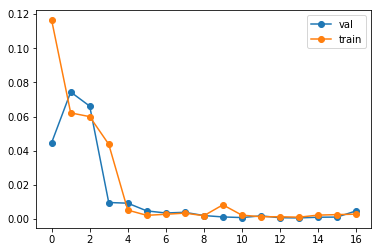

In [13]:
plt.figure(1)
plt.clf()
plt.plot(np.asarray(val_loss),'-o',label='val')
plt.plot(np.asarray(train_loss),'-o',label='train')
plt.legend()
print('Best valid loss {}'.format(np.min(val_loss)))

In [14]:
print('Loading best model: %s' % model_fname)
model_stateful=load_model(model_fname)

n_clip_tpt=1000
x_test_clip, y_test_clip=get_data_clip(x_test,y_test,n_clip_tpt,n_wind)

print('Predicting')
predicted_stateful = model_stateful.predict(x_test_clip, batch_size=batch_size)

Loading best model: temp_stateful.h5
25000
start_id: 18253
Predicting


Plotting Results


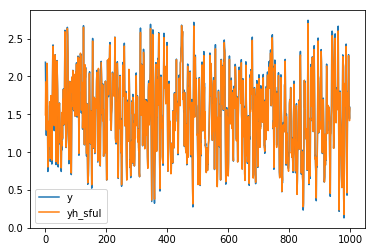

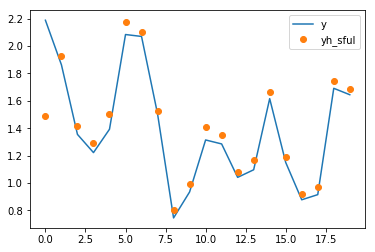

In [15]:
print('Plotting Results')
plt.figure(1)
plt.clf()
plt.plot(y_test_clip,label='y')
plt.plot(predicted_stateful,label='yh_sful')
#plt.plot(predicted_stateless,label='yh_sless')
plt.legend()

n_show=20
plt.figure(2)
plt.clf()
plt.plot(y_test_clip[:n_show],label='y')
plt.plot(predicted_stateful[:n_show],'o',label='yh_sful')
#plt.plot(predicted_stateless[:n_show],'o',label='yh_sless')
plt.legend()